In [2]:
import numpy as np, matplotlib.pyplot as plt

## Exercises for Chapter 7
```
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%                                                                %%%
%%%     COMPUTATIONAL PHYSICS, M. NEWMAN, CHAPTER 7, EXERCISES     %%%
%%%                                                                %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
```

  Exercise 7.1  

**Fourier transforms of simple functions**

 Write Python programs to calculate the
coefficients in the discrete Fourier transforms of the following periodic
functions sampled at $N=1000$ evenly spaced points, and make plots of their
amplitudes similar to the plot shown in Fig. 7.4:

1. A single cycle of a square-wave with amplitude 1

2. The sawtooth wave $y_n=n$

3. The modulated sine wave $y_n = \sin(\pi n/N) \sin(20\pi n/N)$

If you wish you can use the Fourier transform function from the file
|dft.py| as a starting point for your program.

### 练习7.1

**简单函数的傅里叶变换**

写python程序计算下面的周期函数的傅里叶变换的系数，在线性空间均匀采样，采样点数为$N=1000$, 画出它们的振幅图像.

1. 一个周期的方波，振幅为1;
2. 锯齿波$y_n=n$;
3. 调制的正弦波$y_n = \sin(\pi n/N) \sin(20\pi n/N)$.

你可以使用文件dft.py中的傅里叶变换函数作为开始程序.

### 练习7.2

**探测周期性**

从网址 http://www.sidc.be/silso/datafiles 下载太阳黑子数据 (建议选择月平均的太阳黑子数据)，包括1749年1月开始的每个月观测到的太阳黑子数目. 参考INFO来确定你需要读入哪一列数据.

1. 写程序读入数据，画出太阳黑子随时间变化的图像. 你会看到太阳黑子数目以规律的周期变化. 估计一下周期有多少个月.

2. 修改程序计算黑子数据的傅里叶变换，画出傅里叶变换系数$|c_k|^2$随$k$变化的图, 也称为太阳黑子信号的功率谱. 可以看到在非零频率有一个高些的峰. 这个峰告诉我们傅里叶级数中有一项的振幅高于周围其它项---在这个频率有一个大的正弦项, 这个频率对应着在原初信号中看到的周期性.

3. 找到峰值对应的频率$k$. 对应这个$k$的正弦波的周期是多少？这个周期应该和你在前面估计的结果相差不大.

这类傅里叶分析对周期性信号很灵敏. 甚至在肉眼看不清的情况下如果存在周期性信号, 也可以用傅里叶变换找到.

### 练习7.3

**乐器的傅里叶变换**

线上资源里面提供了两个文件*piano.txt*和*trumpet.txt*, 这两个文件分别包含钢琴和小号的单音节波形数据.

1. 写一个程序从其中一个文件中读入波形并画出, 之后计算其离散傅里叶变换并以类似图7.4的方式画出前10000个系数的大小. 注意这里应当使用快速傅里叶变换算法，因为文件中的数据点很多.

    将你的程序应用于钢琴和小号的波形, 从傅里叶变换系数的图像简单讨论钢琴和小号的声音各有什么特点.



2. 两个波形的记录速率都是44100样本/秒, 在记录过程中两个乐器演奏相同的音符. 从你傅里叶变换的结果计算它们演奏的是什么音符(提示: 中央C的音符是261Hz)

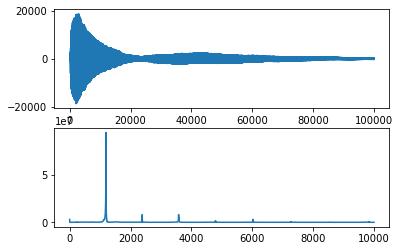

In [6]:
piano = np.loadtxt('piano.txt')
plt.subplot(2,1,1)
plt.plot(piano)
plt.subplot(2,1,2)
y = np.abs(np.fft.fft(piano))
plt.plot(y[:10000])

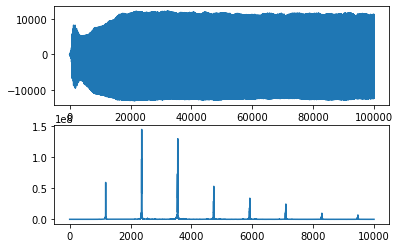

In [11]:
trumpet = np.loadtxt('trumpet.txt')
plt.subplot(2,1,1)
plt.plot(trumpet)
plt.subplot(2,1,2)
y = np.abs(np.fft.fft(trumpet))
plt.plot(y[:10000])

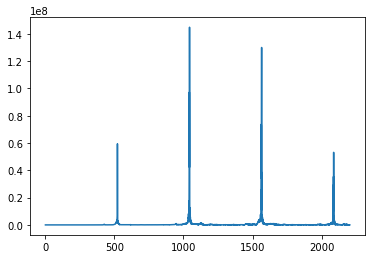

In [17]:
dt = 1/44100
freq = (np.arange(y.size))/(y.size-1)/dt
n = 5000
plt.plot(freq[:n],y[:n])

### 练习7.4

**傅里叶滤波和平滑**

线上有一个名称为*dow.txt*的文件. 它包含了自2006年下半年到2010年年终期间每一个交易日结束时道琼斯工业平均指数的值, 即美国股票市场平均价格的一个衡量标准》

写程序完成下面的问题:

1. 读入*dow.txt*, 并画出.

2. 使用numpy.fft包中的rfft函数计算离散傅里叶变换系数, 它产生一个数组，包含$\frac{1}{2}N+1$个复数.

3. 现在将数组的除前10%以外的元素设为0(即: 将后90%的元素设为0, 保持前10%不变).

4. 用irfft计算设置好的数组的傅里叶逆变换, 将结果和原初的数据画在同一张图中. 你可能需要调整两个曲线的颜色以便于两个曲线都显示的比较清楚. 点评你看到的结果. 当你将傅里叶系数设置为0的时候发生了什么?

5. 修改程序，将后面98%的傅里叶变换系数设置为0, 再运行前面的步骤.

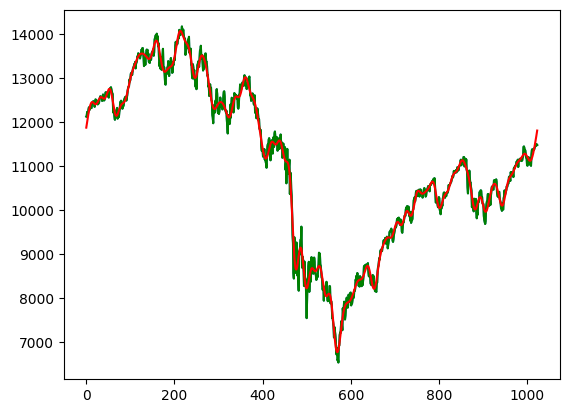

In [3]:
#1.
d = np.loadtxt('dow.txt')
plt.plot(d)

y=np.fft.rfft(d)
k = int(y.size*0.1)
y[k:] = 0
d1 = np.fft.irfft(y)
plt.plot(d,'g-')
plt.plot(d1,'r-')

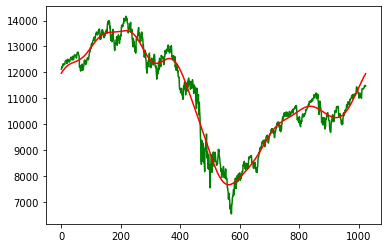

In [46]:
y=np.fft.rfft(d)
k = int(y.size*0.02)
y[k:] = 0
d2 = np.fft.irfft(y)
plt.plot(d,'g-')
plt.plot(d2,'r-')

高频信号的傅里叶变换系数设置为0使得高频信号丢失, 傅里叶逆变换的信号变得平滑。

### 练习7.5
如果你某一做练习7.4, 先做7.4.

函数$f(t)$代表频率为1Hz, 振幅为1的方波
$$
f(t) = \left\lbrace\begin{array}{rl}
          1  & \qquad\mbox{如果 $\lfloor 2t \rfloor$ 是偶数,} \\
         -1  & \qquad\mbox{如果 $\lfloor 2t \rfloor$ 是奇数,}
       \end{array}\right.
$$
这里$\lfloor x\rfloor$代表$x$向下取整. 让我们用傅里叶变换来平滑这个函数, 和前面的练习类似. 写程序创建一个长度为$N$的数组, 包含这个方波一个周期的1000个均匀分布的样本点. 计算数组的离散傅里叶变换. 现在将除前10个傅里叶变换系数之外的系数设为0，之后逆变换来恢复平滑后的信号。在同一幅图中画出原信号和傅里叶逆变换重建的信号. 你会发现信号不是简单的平滑---结果中出现伪信号和摆动. 简单解释这些现象出现的原因.

类似这样的伪信号产生于音频或视频压缩时某些被忽略的傅里叶变换系数，是声音和图像数字压缩不完美的主要原因.

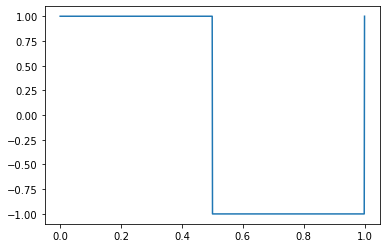

In [48]:
def f(t):
    if int(2*t)%2 == 0:
        return 1
    else:
        return -1
t = np.linspace(0,1,1000)
fu = np.zeros(t.size)
for i in range(t.size):
    fu[i] = f(t[i])
plt.plot(t,fu)

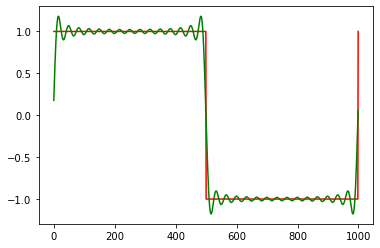

In [49]:
y = np.fft.rfft(fu)
y[30:] = 0
ifu = np.fft.irfft(y)
plt.plot(fu,'r-')
plt.plot(ifu,'g')

  Exercise 7.6  

**Comparison of the DFT and DCT**

 This exercise will be easier if you have already done Exercise 7.4.

Exercise 7.4 looked at data representing the variation of the Dow Jones
Industrial Average, colloquially called "the Dow,'' over time.  The
particular time period studied in that exercise was special in one sense:
the value of the Dow at the end of the period was almost the same as at the
start, so the function was, roughly speaking, periodic.  In the on-line
resources there is another file called |dow2.txt|, which also contains
data on the Dow but for a different time period, from 2004 until 2008.
Over this period the value changed considerably from a starting level
around 9000 to a final level around 14000.

1. Write a program similar to the one for Exercise 7.4, part (e), in
  which you read the data in the file |dow2.txt| and plot it on a
  graph.  Then smooth the data by calculating its Fourier transform,
  setting all but the first 2\% of the coefficients to zero, and inverting
  the transform again, plotting the result on the same graph as the
  original data.  As in Exercise 7.4 you should see that the data are
  smoothed, but now there will be an additional artifact.  At the beginning
  and end of the plot you should see large deviations away from the true
  smoothed function.  These occur because the function is required to be
  periodic---its last value must be the same as its first---so it needs to
  deviate substantially from the correct value to make the two ends of the
  function meet.  In some situations (including this one) this behavior is
  unsatisfactory.  If we want to use the Fourier transform for smoothing,
  we would certainly prefer that it not introduce artifacts of this kind.

2. Modify your program to repeat the same analysis using discrete cosine
  transforms.  You can use the functions from |dcst.py| to perform the
  transforms if you wish.  Again discard all but the first 2\% of the
  coefficients, invert the transform, and plot the result.  You should see
  a significant improvement, with less distortion of the function at the
  ends of the interval.  This occurs because, as discussed at the end of
  Section 7.3, the cosine transform does not force the value of the
  function to be the same at both ends.

It is because of the artifacts introduced by the strict periodicity
of the DFT that the cosine transform is favored for many technological
applications, such as audio compression.  The artifacts can degrade the
sound quality of compressed audio and the cosine transform generally gives
better results.

The cosine transform is not wholly free of artifacts itself however.  It's
true it does not force the function to be periodic, but it does force the
gradient to be zero at the ends of the interval (which the ordinary Fourier
transform does not).  You may be able to see this in your calculations for
part (b) above.  Look closely at the smoothed function and you should see
that its slope is flat at the beginning and end of the interval.  The
distortion of the function introduced is less than the distortion in
part (a), but it's there all the same.  To reduce this effect, audio
compression schemes often use overlapped cosine transforms, in which
transforms are performed on overlapping blocks of samples, so that the
portions at the ends of blocks, where the worst artifacts lie, need not be
used.

### 练习7.7

**快速傅里叶变换**

写你自己的程序, 根据7.4.1节的公式，对$N$是2的幂的情况下计算快速傅里叶变换. 作为测试，用它计算*pitch.txt*文件中数据的傅里叶变换, 它可以在线上资源中找到. 数据如图7.3所示. 你应该可以复制7.4中的傅里叶变换结果.

This exercise is quite tricky.  You have to calculate the
coefficients $E^{(m,j)}_k$ from Eq. (7.43) for all levels $m$, which means
that first you will have to plan how the coefficients will be stored.
Since, as we have seen, there are exactly $N$ of them at every level, one
way to do it would be to create a two-dimensional complex array of size
$N\times(1+\log_2 N)$, so that it has $N$ complex numbers for each level
from zero to $\log_2 N$.  Then within level $m$ you have $2^m$ individual
transforms denoted by $j=0\ldots 2^m-1$, each with $N/2^m$ coefficients
indexed by $k$.  A simple way to arrange the coefficients would be to put
all the $k=0$ coefficients in a block one after another, then all the $k=1$
coefficients, and so forth.  Then $E^{(m,j)}_k$ would be stored in the
$j+2^mk$ element of the array.

In [ ]:
这个练习有点棘手. 

This method has the advantage of being quite simple to program, but the
disadvantage of using up a lot of memory space.  The array contains
$N\log_2N$ complex numbers, and a complex number typically takes sixteen
bytes of memory to store.  So if you had to do a large Fourier transform
of, say, $N=10^8$ numbers, it would take $16N\log_2N\simeq42$ gigabytes of
memory, which is much more than most computers have.

An alternative approach is to notice that we do not really need to store
all of the coefficients.  At any one point in the calculation we only need
the coefficients at the current level and the previous level (from which
the current level is calculated).  If one is clever one can write a program
that uses only two arrays, one for the current level and one for the
previous level, each consisting of $N$ complex numbers.  Then our transform
of $10^8$ numbers would require less than four gigabytes, which is fine on
most computers.

(There is a third way of storing the coefficients that is even more
efficient.  If you store the coefficients in the correct order, then you
can arrange things so that every time you compute a coefficient for the
next level, it gets stored in the same place as the old coefficient from
the previous level from which it was calculated, and which you no longer
need.  With this way of doing things you only need one array of $N$ complex
numbers---we say the transform is done ''in place.''  Unfortunately,
this in-place Fourier transform is much harder to work out and harder to
program.  If you are feeling particularly ambitious you might want to give
it a try, but it's not for the faint-hearted.)

### 练习7.8

**衍射光栅**

练习5.19 （206页) 研究了衍射光栅的物理, 用下面的公式计算衍射图样的强度
$$
I(x) = \biggl| \int_{-w/2}^{w/2} \sqrt{q(u)}\>
                e^{ i 2\pi xu/\lambda f} \> d u \biggr|^2,
$$
这里$w$是光栅的宽度, $\lambda$是光的波长, $f$是透镜的焦距, $q(u)$是到中心轴的距离$u$处的衍射光栅的强度透射函数, 即， 入射光通过的比例.
在练习5.19中， 我们直接用积分的部分估计这个表达式, 但是一个更有效的方法是注意到积分实际上就是一个傅里叶变换. 用$N$个点的梯形积分近似积分, $u_n=nw/N-w/2$, 我们得到
\begin{align*}
\int_{-w/2}^{w/2} \sqrt{q(u)}\> e^{ i 2\pi xu/\lambda f} \> d u
  &\simeq {w\over N}  e^{ i\pi wx/\lambda f}
     \sum_{n=0}^{N-1} \sqrt{q(u_n)} \> e^{ i 2\pi wxn/\lambda f N} \\
  &= {w\over N}  e^{ i\pi k}
     \sum_{n=0}^{N-1} y_n \> e^{ i 2\pi kn/N},
\end{align*}
这里$k=wx/\lambda f$ 以及 $y_n=\sqrt{q(u_n)}$. 比较公式 (7.15),
我们看到这个表达式的和等于$y_n$的离散傅里叶变换的第$k$个系数的复共轭. 代入强度$I(x)$的公式, 我们有
$$
I(x_k) = {w^2\over N^2} |c_k|^2,
$$
这里
$$
x_k = {\lambda f\over w}\,k.
$$
这样我们可以用傅里叶变换计算点$x_k$处的衍射模式的强度.

但是有一个问题. 假设$k$是一个整数, $k=0\ldots N-1$，强度估计点$x_k$在屏上的间距是$\lambda f/w$. 这个距离在某些情况下可以很大. 例如, 在练习5.19中, 我们有$\lambda=500\,$nm, $f=1\,$m, 和 $w=200\,\mu$m, 屏的宽度为$10\,$cm, 这意味着$\lambda f/w = 2.5\,$mm, 我们在屏上仅有40个数据点. 这不足以画一个有意义的衍射图样.

一个解决这个问题的方法是增加光栅宽度$W>w$, 这使得间距$\lambda f/W$变小. 我们可以在光栅的一侧或者两侧增加宽度, 但是---这一点很关键---增加的部分必须是不透明的, 它不能透射光, 这样系统的物理才能保持不变. 换句话说, 我们需要在测量光栅透射轮廓的数组$y_n$上添加0以增加光栅宽度的同时保持其透射性质不变. 例如，将宽度增加到$W=10w$, 我们要将$y_n$的数据点数$N$增加10倍, 额外增加的点设为0. 额外增加的点可以在开始，末尾或者中间, 对答案没有影响, 强度由下式给出
$$
I(x_k) = {W^2\over N^2} |c_k|^2,
$$
这里
$$
x_k = {\lambda f\over W}\,k.
$$

写一个python程序, 用快速傅里叶变换计算光栅的衍射模式, 透射函数为 $q(u) = \sin^2
\alpha u$ (与练习5.19相同), 狭缝宽度为 $20\,\mu$m
[即 $\alpha=\pi/(20\,\mu$m)] 以及上面描述的参数:
$w=200\,\mu$m, $W=10w=2\,$mm, 入射光波长
$\lambda=500\,$nm, 透镜焦距为1米, 屏为
$10\,$cm 宽. 选择合适的数据点数以给出光栅透射函数的合理近似，画出屏上的衍射图样，它是位置$x$的函数, $x$的范围是 $-5\,$cm${}\le x\le 5\,$cm.  如果你完成了练习5.19，确保两个练习的答案一致.

### 练习7.9

**图像卷积**

你可能在电视上开过, 例如在那些犯罪剧中显示的. 他们有一个犯罪现场的模糊图像，然后点击了计算机的几个按键之后图片如变魔术一般的变得锐利和清晰, 所以你可以认出某个人的脸, 或者一个标志上的某些字符. 这是科幻（像很多这类电视剧展示的其它东西）小说吗? 实际上不是. 它是真的，在这个练习中你将写程序实现它.

当一副图片模糊时，图片上每一个点都被某个"涂抹函数"涂抹了，技术上"涂抹函数"被称为*点扩散函数*. 我们可以将之数学表述如下. 为了简化, 我们假设工作的对象时一副黑白照片, 这样图片可以用单个函数$a(x,y)$表示，它给出每一个点$(x,y)$处的亮度. 之后我们用$f(x,y)$表示点扩散函数. 这意味着原初的一个亮点最终表现为$f(x,y)$. 如果$f(x,y)$是一个比较宽的函数，那么图像的模糊程度很严重. 如果很窄，则图像相对锐利.

一般的, 模糊图像的亮度函数$b(x,y)$在$(x,y)$点表示为
$$
b(x,y) = \int_0^K \int_0^L a(x',y') f(x-x',y-y') \> d x'\> d y',
$$
这里 $K\times L$ 是图像的维度. 这个方程被称为图像和点扩散函数的卷积.

二维函数比较复杂, 为了从数学上理解这个概念，我们先看与我们的问题等价的一维问题. 一旦我们理解了1D问题, 我们将回到二维版本. 
上面卷积的一维情况为
$$
b(x) = \int_0^L a(x') f(x-x') \> d x'.
$$
函数$b(x)$可以用方程(7.5)的傅里叶级数表示:
$$
b(x) = \sum_{k=-\infty}^\infty
         \tilde{b}_k \exp\biggl(  i {2\pi k x\over L} \biggr),
$$
这里
$$
\tilde{b}_k = {1\over L} \int_0^L b(x)
                         \exp\biggl( - i {2\pi k x\over L} \biggr) \> d x
$$
是傅里叶系数. 将$b(x)$的表达式代入这个方程给出
\begin{align}
\tilde{b}_k &= {1\over L} \int_0^L \int_0^L a(x') f(x-x')
                         \exp\biggl( - i {2\pi k x\over L} \biggr)
                         \> d x'\> d x \\
            &= {1\over L} \int_0^L \int_0^L a(x') f(x-x')
                         \exp\biggl( - i {2\pi k (x-x')\over L} \biggr)
                         \exp\biggl( - i {2\pi k x'\over L} \biggr)
                         \> d x'\> d x.
\end{align}
现在做变量代换$X=x-x'$, 我们得到
$$
\tilde{b}_k = {1\over L} \int_0^L a(x')
                         \exp\biggl( - i {2\pi k x'\over L} \biggr)
                         \int_{-x'}^{L-x'} f(X)
                         \exp\biggl( - i {2\pi k X\over L} \biggr) \> d X
                         \> d x'.
$$
如果我们通过令$f(x)$在间隔0到$L$上不断重复而使其变为为周期函数，那么上面第二个积分可以写作I
\begin{align*}
\int_{-x'}^{L-x'} f(X) \exp\biggl( - i {2\pi k X\over L} \biggr) \> d X
&= \int_{-x'}^0 f(X) \exp\biggl( - i {2\pi k X\over L} \biggr) \> d X
   \\
&\hspace{5em}{} + \int_0^{L-x'} f(X) \exp\biggl( - i {2\pi k X\over L}
   \biggr) \> d X \\
&\hspace{-12em} {} = \exp\biggl(  i {2\pi k L\over L} \biggr)
   \int_{L-x'}^L f(X) \exp\biggl( - i {2\pi k X\over L} \biggr) \> d X
   + \int_0^{L-x'} f(X) \exp\biggl( - i {2\pi k X\over L} \biggr) \> d X
   \\
&\hspace{-12em} {} = \int_0^L f(X)
                    \exp\biggl( - i {2\pi k X\over L} \biggr) \> d X,
\end{align*}
这就是简单的$L$ 乘以$f(x)$的傅里叶变换 $\tilde{f}_k$.将这个结果代回$\tilde{b}_k$的方程, 得到
$$
\tilde{b}_k = \int_0^L a(x')
              \exp\biggl( - i {2\pi k x'\over L} \biggr)
              \tilde{f}_k \> d x'
            = L\,\tilde{a}_k\tilde{f}_k.
$$
换句话说, 除了因子$L$， 模糊图片的傅里叶变换是未模糊图片和点扩散函数的傅里叶变换的乘积.

现在已经清楚如何对图片去模糊化. 我们对模糊的图片进行傅里叶变换得到 $\tilde{b}_k =
L\,\tilde{a}_k\tilde{f}_k$. 我们还对点扩散函数傅里叶变换得到 $\tilde{f}_k$. 然后二者相除 :
$$
{\tilde{b}_k\over L\tilde{f}_k} = \tilde{a}_k
$$
这给出未模糊图片的傅里叶变换. 最后，我们对$\tilde{a}_k$ 做傅里叶逆变换得到未模糊图片. 这个过程就是去模糊的过程，是卷积的逆过程，被称为解卷积.

实际图像时二维的, 但是数学过程完全一样. 对于一个$K\times L$维的图片, 我们发现二维傅里叶变换有如下关系
$$
\tilde{b}_{kl} =  KL\tilde{a}_{kl}\tilde{f}_{kl}\,,
$$
同样的我们将模糊图像的傅里叶变换除以点扩散函数的傅里叶变换以获得未模糊图像的傅里叶变换.

在数字图像情况下, 图像不时单纯的函数$f(x,y)$，而是栅格化的样本点, 我们的傅里叶变换也从连续变成离散. 但是数学原理相同.

实际应用中的去模糊过程的难点在于我们通常不知道点扩散函数. 一般我们必须不断试验直到找到某些有效的点扩散函数. 对很多相机来说，可以合理假设点扩散函数时高斯分布:
$$
f(x,y) = \exp\biggl( -{x^2+y^2\over2\sigma^2} \biggr),
$$
这里$\sigma$是高斯宽度. 尽管可以这样假设，我们还是不知道$\sigma$的值, 我们必须做实验找到一个合理的值. 在下面的练习中, 为了简化，我们假设我们知道$\sigma$的值.


1. 在线上你将找到一个名为*blur.txt*的文件, 它包含了二维数值，数值代表一个黑白照片的亮度---一个严重失焦的照片，它被故意用一个宽度$\sigma=25$的高斯点扩散函数模糊了. 写程序将数据读入一个二维数组，用强度图把数组表示出来. 你可以看到图像的样子. 如果你设置不好, 它将上下颠倒. 调整程序直到显示正确. (提示: 图片上有天空，它是亮的，位于图片上部，还有大地，是暗的，位于图片底部.)

2. 写另外一个程序，创建一个数组，与图片维数一样，包含高斯函数$f(x,y)$的样本点, $\sigma=25$. 在同一屏幕上显示这些值的强度图， 以获得点扩散函数的可视化效果. 记住点扩散函数是周期性的 (沿着两个轴都是)，这意味着在间隔末端负的$x$和$y$对应的值是重复的. 因为高斯函数的中心在原点，这意味着你图像的四角应该是亮的补丁，例如这样:
<img src="psf.png">

3. 联合你的两个程序，用numpy.fft中的rfft2和irfft2函数加入傅里叶变换, 使得程序完成下列工作:

   a. 读入模糊照片
   
   b. 计算点扩散函数
   
   c. 对二者做傅里叶变换
   
   d. 一个除以另一个
   
   e. 做傅里叶逆变换获得去模糊图像
   
   f. 将去模糊图片展示在屏幕上

   当你完成后，你应该能够看到图片中的景色, 尽管它仍然不是完美的锐化.


   提示: 你需要考虑的一个事情是当点扩散函数的傅里叶变换是0或者接近于0的情况. 这种情况下，如果你除以它你会得到一个错误信息(因为不能除以0)或者一个非常大的数(因为除了一个非常小的数). 一个有效的解决办法是如果点扩散函数的傅里叶变换的一个值小于某一个量$\epsilon$时，你不要除以它---就是保留系数不变. $\epsilon$的值不是非常关键，但是一个合理的取值是$10^{-3}$.


4. 要记住傅里叶变换是0的情况，是什么限制了我们锐化图片的能力? 为什么我们不能完美锐化任何图片?

我们在这里看到了一个正常图片锐化的过程, 但是它还有很多物理应用. 比如，天文上用来增强望远镜照片的效果. 一个很著名的应用是对于哈勃空间望远镜图片，在意识到它的主镜有一个严重的产品缺陷，返回模糊照片时---科学家们采样傅里叶变换技术部分修正了模糊的效果.

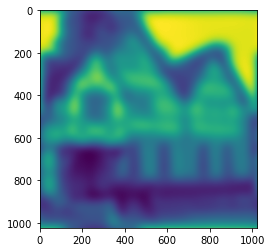

In [51]:
data = np.loadtxt("blur.txt")
plt.imshow(data)